<a href="https://colab.research.google.com/github/Malinovskiy159/web/blob/main/lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
import tensorflow as tf
print(tf.__version__)
from google.colab import drive
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import EarlyStopping

2.17.1


In [48]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
class1=[4,7]
train_indexes = np.where((y_train == class1[0]) | (y_train == class1[1]))[0]
test_indexes = np.where((y_test == class1[0]) | (y_test == class1[1]))[0]
x_train = x_train[train_indexes]
y_train_binary = y_train[train_indexes]
x_test = x_test[test_indexes]
y_test_binary = y_test[test_indexes]
y_train = (y_train_binary == class1[0]).astype(int)
y_test = (y_test_binary == class1[0]).astype(int)

In [49]:
#@title
def show(images, labels, predicted_labels=None):
    plt.figure(figsize=(10,10))
    for i in range(16):
        plt.subplot(4,4, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.gray)
        if predicted_labels is not None:
            arr_binary = np.where(predicted_labels == 0, 1,0)
            plt.title(f"Real: {y_test[i]}, Pred: {np.round(predicted_labels[i])}", color="green" if np.round(predicted_labels[i])== y_test[i] else "red")
        else:
            plt.title(f"Real label: {labels[i]}")

def show_progress(history: dict):
    plt.figure(figsize=(10, 5))
    ax1 = plt.subplot(1,2,1)
    plt.plot(history["acc"],label='train accuracy')
    plt.plot(history["val_acc"], label='test accuracy')
    ax2 = plt.subplot(1,2,2)
    plt.plot(history["loss"],label='train_loss')
    plt.plot(history["val_loss"],label='test_loss')

    ax1.legend(loc='best')
    ax2.legend(loc='best')
    plt.grid()
    plt.tight_layout()
    plt.show()

In [50]:
x_train.shape

(10000, 32, 32, 3)

In [51]:
x_test.shape

(2000, 32, 32, 3)

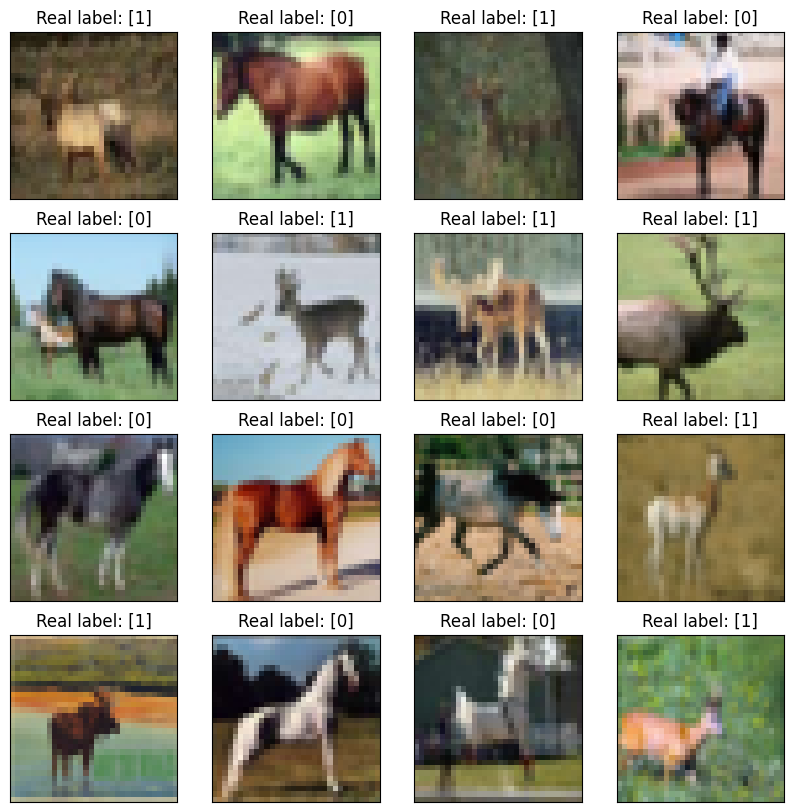

In [52]:
show(x_train, y_train)

In [53]:
x_train, x_test2, y_train, y_test2 = train_test_split(x_train, y_train, test_size = 0.20, stratify = y_train)

In [54]:
drive.mount('/content/drive/')
path = Path("/content/drive/My Drive/int_an/cifar10/model_1")
path.mkdir(exist_ok = True, parents = True)
assert path.exists()
cpt_filename = "best_model_cifar10.weights.h5"
cpt_path =str(path / cpt_filename)

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [55]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Input(shape=(32, 32, 3)),
  tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
  tf.keras.layers.MaxPooling2D((2, 2)),
  tf.keras.layers.Dropout(0.1),
  tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
  tf.keras.layers.MaxPooling2D((2, 2)),
  tf.keras.layers.Dropout(0.1),
  tf.keras.layers.Conv2D(16, (3, 3), activation='relu'),
  tf.keras.layers.MaxPooling2D((2, 2)),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dropout(0.1),
  tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['acc'])
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history1 = model.fit(x_train, y_train, epochs = 30, validation_split = 0.2, batch_size =64)
model.save_weights(cpt_path)


Epoch 1/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - acc: 0.5411 - loss: 2.5008 - val_acc: 0.5681 - val_loss: 0.6819
Epoch 2/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - acc: 0.6085 - loss: 0.6805 - val_acc: 0.6175 - val_loss: 0.6521
Epoch 3/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - acc: 0.6300 - loss: 0.6445 - val_acc: 0.6831 - val_loss: 0.6030
Epoch 4/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.6837 - loss: 0.5999 - val_acc: 0.7138 - val_loss: 0.5529
Epoch 5/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.7282 - loss: 0.5379 - val_acc: 0.7625 - val_loss: 0.4850
Epoch 6/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.7583 - loss: 0.4972 - val_acc: 0.7738 - val_loss: 0.4713
Epoch 7/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.7719 - loss: 0.4867 - val_acc: 0.8000 - val_loss: 0.4444
Epoch 8/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.7861 - loss: 0.4544 - val_acc: 0.8019 - val_loss: 0.4481
Epoch 9/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - a

In [56]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)                   │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_18 (MaxPooling2D)      │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_19 (MaxPooling2D)      │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_20 (Conv2D)                   │ (None, 4, 4, 16)            │           9,232 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_20 (MaxPooling2D)      │ (None, 2, 2, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 86,069 (336.21 KB)

 Trainable params: 28,689 (112.07 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 57,380 (224.14 KB)

In [57]:
assert len(list(path.glob("*"))) != 0, f"Checkpoint dir {path}"
assert "acc" in history1.history, "History object must contain Accuracy. Please, retrain with this metric"
assert "val_acc" in history1.history, "Please, provide validation_data in model.fit."
assert np.max(history1.history["val_acc"]) > 0.7, "Validation accuracy must be more than 0.95"
print("Training tests passed")

Training tests passed


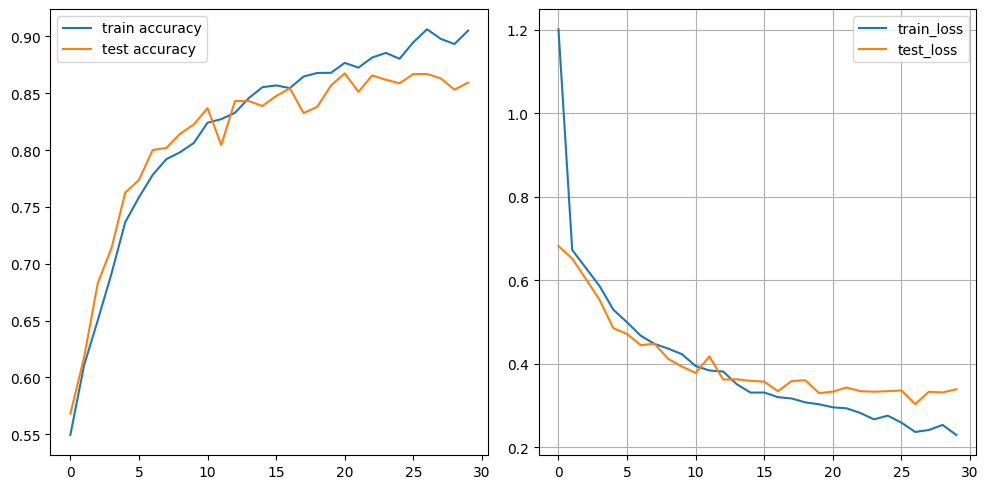

In [58]:
show_progress(history1.history)

In [59]:
loss, acc = model.evaluate(x_test, y_test)

print(f"Accuracy of restored model {acc*100 :.2f}%")
assert acc > 0.8

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - acc: 0.8373 - loss: 0.3727
Accuracy of restored model 84.45%


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


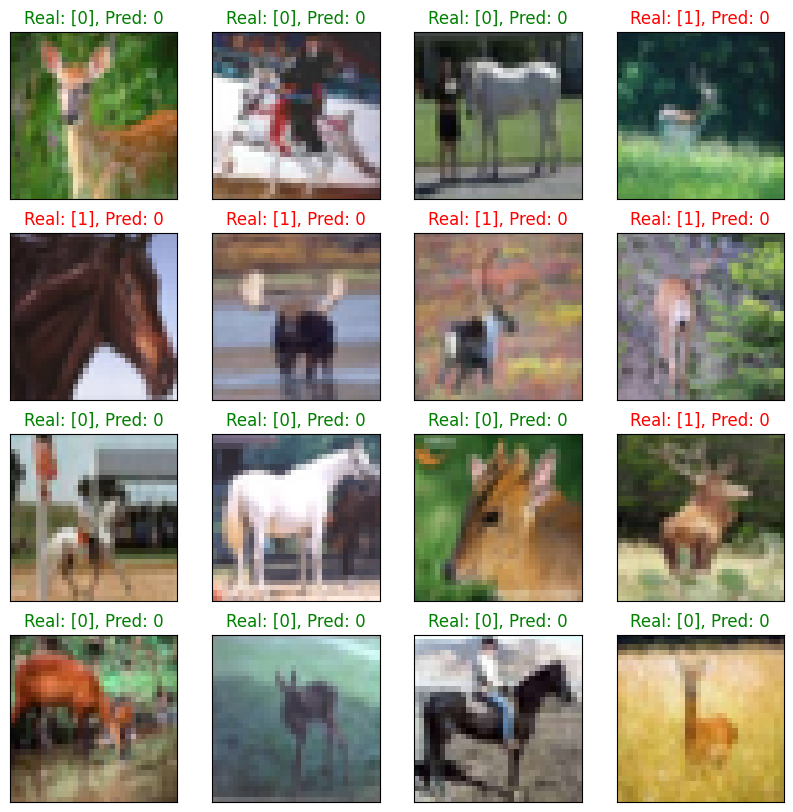

In [60]:
test_images = x_test[:16]
predicted_labels = model.predict(x_test)
predicted_labels1 = model.predict(test_images)
idxs = np.random.choice(np.arange(len(x_test)), 16, replace=False)
show(x_test[idxs].reshape((-1, 32, 32, 3)), y_test[idxs], np.argmax(predicted_labels[idxs], axis=1))

In [61]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Input(shape=(32, 32, 3)),
  tf.keras.layers.Conv2D(32, (3, 3), activation='elu'),
  tf.keras.layers.MaxPooling2D((2, 2)),
  tf.keras.layers.Conv2D(64, (3, 3), activation='elu'),
  tf.keras.layers.MaxPooling2D((2, 2)),
  tf.keras.layers.Conv2D(16, (3, 3), activation='elu'),
  tf.keras.layers.MaxPooling2D((2, 2)),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer = 'adagrad',
              loss = 'binary_crossentropy',
              metrics = ['acc'])
history2 = model.fit(x_train, y_train, epochs = 20, validation_split = 0.2, batch_size =32)

Epoch 1/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - acc: 0.5967 - loss: 2.1902 - val_acc: 0.6544 - val_loss: 1.0475
Epoch 2/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.6658 - loss: 0.8943 - val_acc: 0.6719 - val_loss: 0.8023
Epoch 3/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.7036 - loss: 0.7114 - val_acc: 0.7069 - val_loss: 0.7079
Epoch 4/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.7153 - loss: 0.6454 - val_acc: 0.7131 - val_loss: 0.6766
Epoch 5/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.7335 - loss: 0.5966 - val_acc: 0.7169 - val_loss: 0.6481
Epoch 6/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.7539 - loss: 0.5424 - val_acc: 0.7212 - val_loss: 0.6384
Epoch 7/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - acc: 0.7445 - loss: 0.5503 - val_acc: 0.7212 - val_loss: 0.6614
Epoch 8/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - acc: 0.7565 - loss: 0.5360 - val_acc: 0.7337 - val_loss: 0.6030
Epoch 9/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - ac

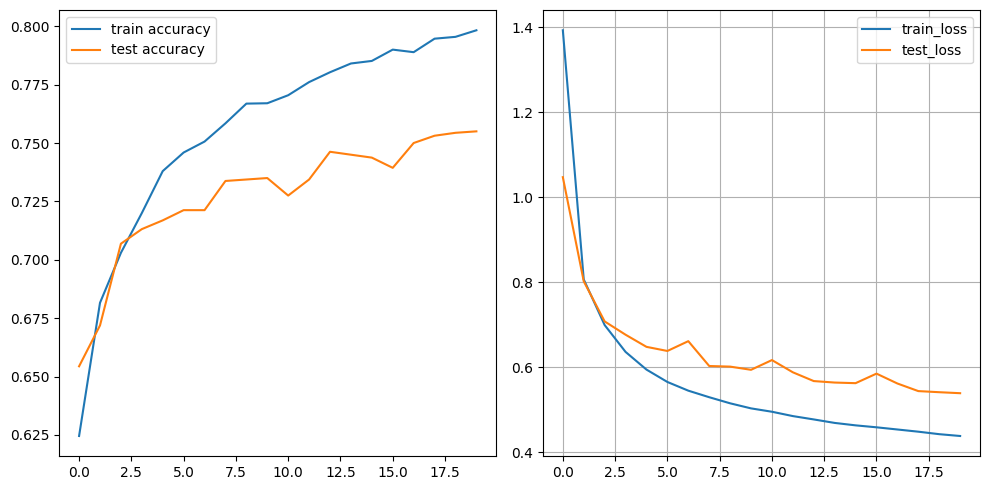

In [62]:
show_progress(history2.history)

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - acc: 0.7570 - loss: 0.5303
Accuracy of restored model 77.40%
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


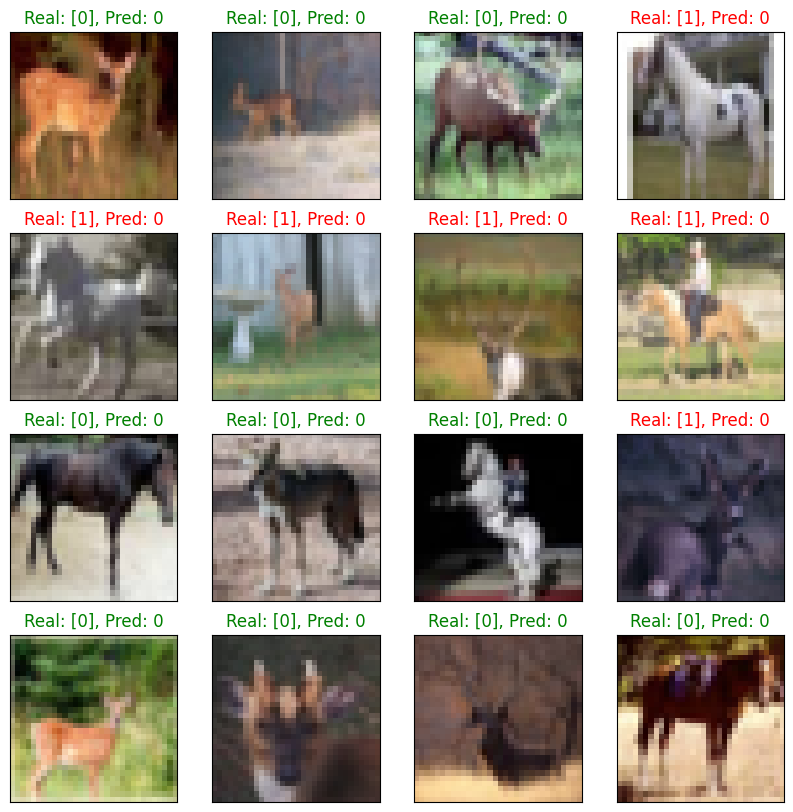

In [63]:
loss, acc = model.evaluate(x_test, y_test)

print(f"Accuracy of restored model {acc*100 :.2f}%")
assert acc > 0.7

test_images = x_test[:16]
predicted_labels = model.predict(x_test)
predicted_labels2 = model.predict(test_images)
idxs = np.random.choice(np.arange(len(x_test)), 16, replace=False)
show(x_test[idxs].reshape((-1, 32, 32, 3)), y_test[idxs], np.argmax(predicted_labels[idxs], axis=1))

In [64]:
from tensorflow.keras.layers import LeakyReLU
model = tf.keras.models.Sequential([
  tf.keras.layers.Input(shape=(32, 32, 3)),
  tf.keras.layers.Conv2D(32, (3, 3), activation=LeakyReLU(alpha=0.1)),
  tf.keras.layers.MaxPooling2D((2, 2)),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Conv2D(64, (3, 3), activation=LeakyReLU(alpha=0.1)),
  tf.keras.layers.MaxPooling2D((2, 2)),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Conv2D(16, (2, 2), activation=LeakyReLU(alpha=0.1)),
  tf.keras.layers.MaxPooling2D((2, 2)),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer = 'rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['acc'])
history3 = model.fit(x_train, y_train, epochs = 20, validation_split = 0.2, batch_size =32)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Epoch 1/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - acc: 0.5381 - loss: 6.6900 - val_acc: 0.7144 - val_loss: 0.5763
Epoch 2/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.6544 - loss: 0.6459 - val_acc: 0.7188 - val_loss: 0.5636
Epoch 3/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.6978 - loss: 0.5953 - val_acc: 0.7775 - val_loss: 0.5254
Epoch 4/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.7175 - loss: 0.5664 - val_acc: 0.6894 - val_loss: 0.5530
Epoch 5/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.7544 - loss: 0.5384 - val_acc: 0.7625 - val_loss: 0.4969
Epoch 6/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.7525 - loss: 0.5238 - val_acc: 0.7381 - val_loss: 0.5001
Epoch 7/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.7690 - loss: 0.5064 - val_acc: 0.7331 - val_loss: 0.5087
Epoch 8/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.7736 - loss: 0.4997 - val_acc: 0.7450 - val_loss: 0.5193
Epoch 9/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - ac

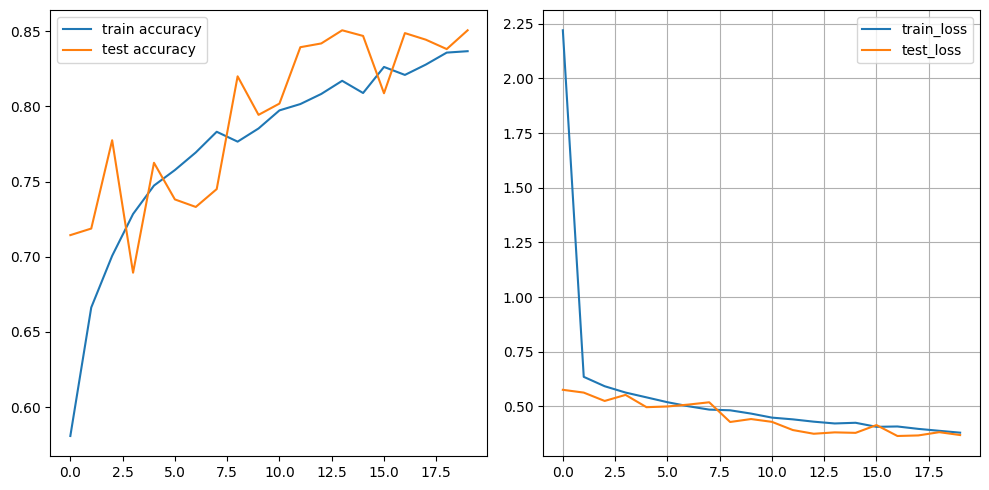

In [65]:
show_progress(history3.history)

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - acc: 0.8325 - loss: 0.3772
Accuracy of restored model 83.65%
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


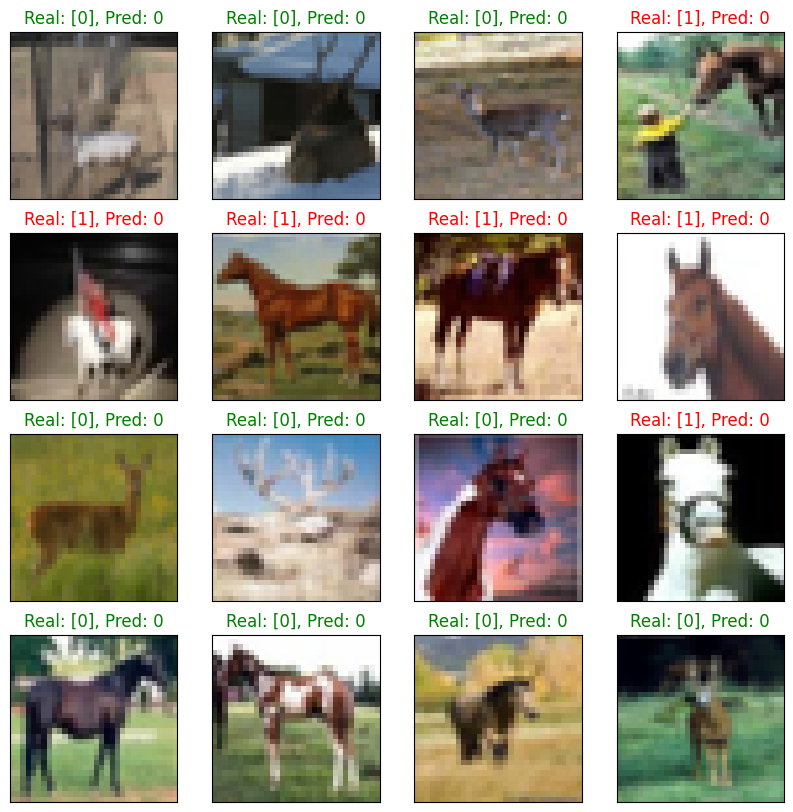

In [66]:
loss, acc = model.evaluate(x_test, y_test)

print(f"Accuracy of restored model {acc*100 :.2f}%")
assert acc > 0.7
test_images = x_test[:16]
predicted_labels = model.predict(x_test)
predicted_labels3 = model.predict(test_images)
idxs = np.random.choice(np.arange(len(x_test)), 16, replace=False)
show(x_test[idxs].reshape((-1, 32, 32, 3)), y_test[idxs], np.argmax(predicted_labels[idxs], axis=1))

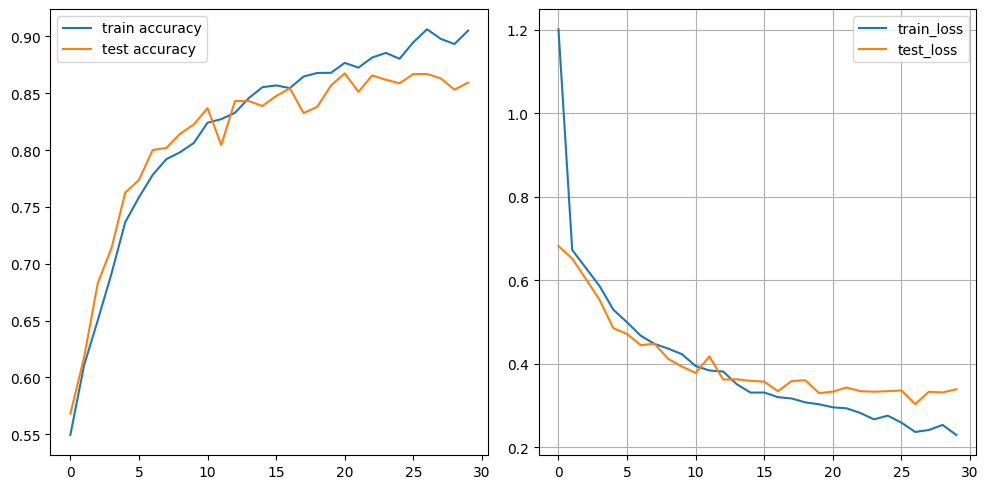

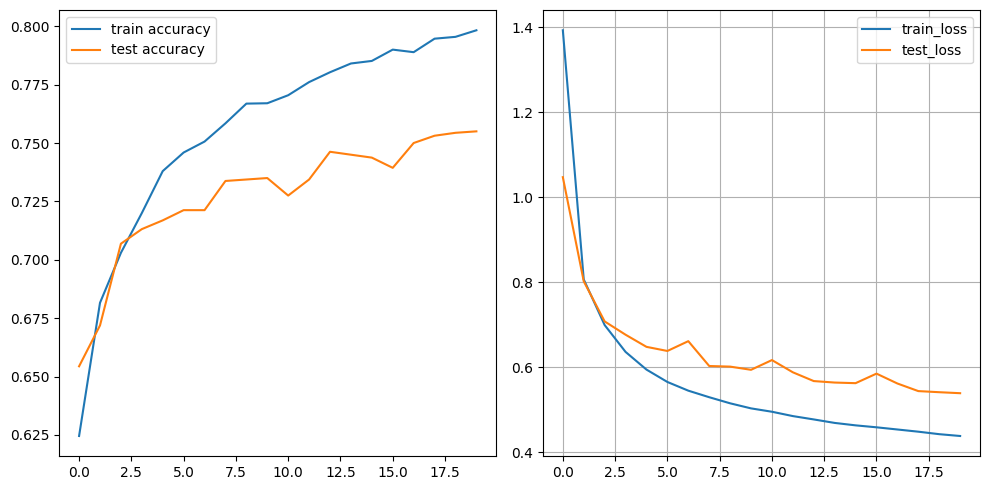

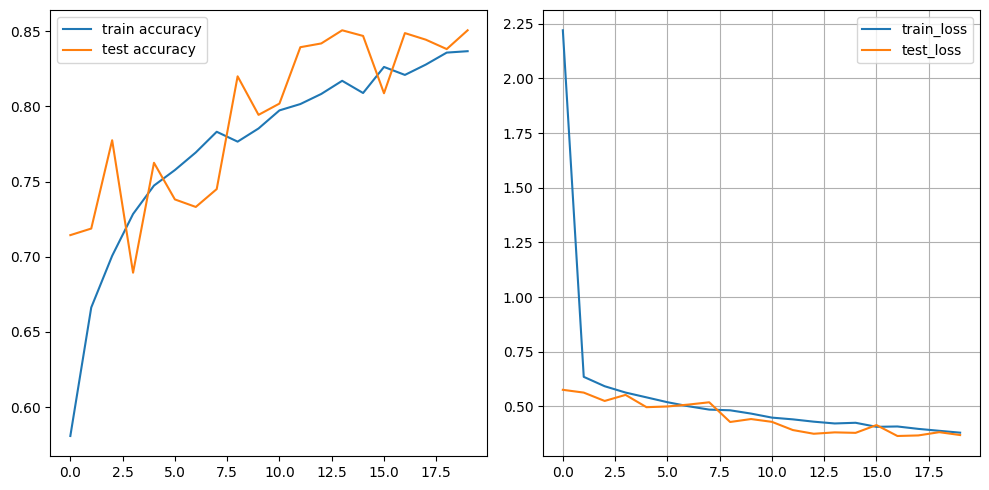

In [67]:
show_progress(history1.history)
show_progress(history2.history)
show_progress(history3.history)

In [68]:
idxs = np.random.choice(np.arange(len(test_images)), 16, replace=False)
import sklearn.metrics
print('precision')
pre1 = sklearn.metrics.precision_score(y_test[idxs], np.round(predicted_labels1[idxs]))
pre2 = sklearn.metrics.precision_score(y_test[idxs], np.round(predicted_labels2[idxs]))
pre3 = sklearn.metrics.precision_score(y_test[idxs], np.round(predicted_labels3[idxs]))
print(pre1)
print(pre2)
print(pre3)
print('recall')
rec1 = sklearn.metrics.recall_score(y_test[idxs], np.round(predicted_labels1[idxs]))
rec2 = sklearn.metrics.recall_score(y_test[idxs], np.round(predicted_labels2[idxs]))
rec3 = sklearn.metrics.recall_score(y_test[idxs], np.round(predicted_labels3[idxs]))
print(rec1)
print(rec2)
print(rec3)
print('f1')
f1 = sklearn.metrics.f1_score(y_test[idxs], np.round(predicted_labels1[idxs]))
f2 = sklearn.metrics.f1_score(y_test[idxs], np.round(predicted_labels2[idxs]))
f3 = sklearn.metrics.f1_score(y_test[idxs], np.round(predicted_labels3[idxs]))
print(f1)
print(f2)
print(f3)

precision
0.7142857142857143
0.5555555555555556
0.7142857142857143
recall
0.8333333333333334
0.8333333333333334
0.8333333333333334
f1
0.7692307692307693
0.6666666666666666
0.7692307692307693
